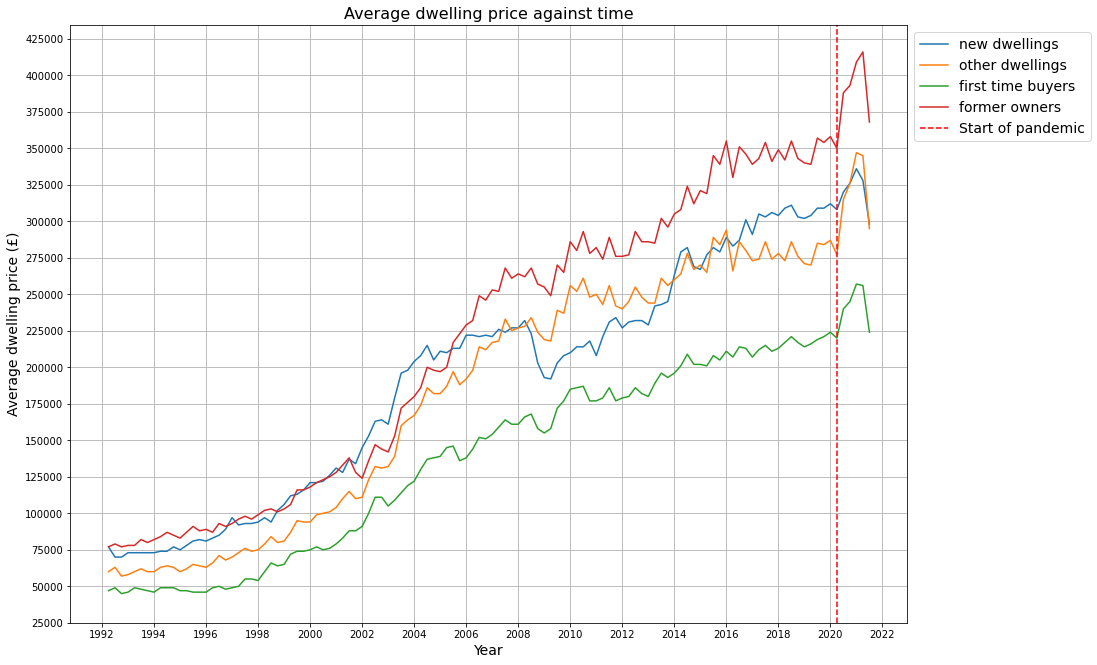

In [206]:
import csv

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

hpitable15 = open('hpitable15.csv', 'r')
    # creating a csv reader object
hpitable15_data = csv.reader(hpitable15)

hpi_table15_full = pd.DataFrame(hpitable15_data)

average_prices = hpi_table15_full.loc[11:129,[0,1,3,7,15,19]]

average_prices.columns = ['year','quarter','new dwellings','other dwellings',
                          'first time buyers',
                          'former owners']

average_prices['year'] = pd.to_numeric(average_prices['year'])

average_prices.reset_index(inplace=True,drop=True)


for i in range(len(average_prices)):
    
    if np.isnan(average_prices.loc[i,'year']) == True:
        
        average_prices.loc[i,'year'] = average_prices.loc[i-1,'year'] + 0.25
        
average_prices = average_prices.iloc[1:,:]


for column in average_prices.columns:
    
    average_prices[column] = average_prices[column].replace(',','',regex=True)

average_prices[['new dwellings','other dwellings','first time buyers','former owners']]\
= average_prices[['new dwellings','other dwellings','first time buyers','former owners']].astype(int)

plt.figure(figsize=(15,11))

for column in average_prices.columns:
    
    if column == 'year' or column == 'quarter':
        
        continue
        
    else :
        
        plt.plot(average_prices['year'],average_prices[column],label=f'{column}')

y_ticks=np.linspace(25000,425000,17)
x_ticks=np.linspace(1992,2022,16)

#print(average_prices)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.axvline(2020.25,color='red',linestyle='--',label='Start of pandemic')
plt.legend(bbox_to_anchor=(1,1),fontsize=14)
plt.title('Average dwelling price against time',fontsize=16)
plt.ylabel(f'Average dwelling price (£)',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.grid()
plt.show()

In [147]:
average_prices


,year,quarter,new dwellings,other dwellings,all dwellings,first time buyers,former owners
1,1992,Q2,77000,60000,62000,47000,77000
2,1992,Q3,70000,63000,64000,49000,79000
3,1992,Q4,70000,57000,59000,45000,77000
4,1993,Q1,73000,58000,60000,46000,78000
5,1993,Q2,73000,60000,62000,49000,78000
...,...,...,...,...,...,...,...
114,2020,Q3,320000,315000,316000,240000,388000
115,2020,Q4,326000,326000,326000,245000,393000
116,2021,Q1,336000,347000,345000,257000,409000
117,2021,Q2,328000,345000,343000,256000,416000
